In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

distances = []

for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(X_train)
    distances.append(km.inertia_)

In [13]:
distances

[1600.0000000000005,
 434.84244202764415,
 73.59005173974353,
 61.71114517556741,
 51.17447664099283,
 39.51393337522415,
 45.51439248398459,
 33.92215186527693,
 32.27750682519102]

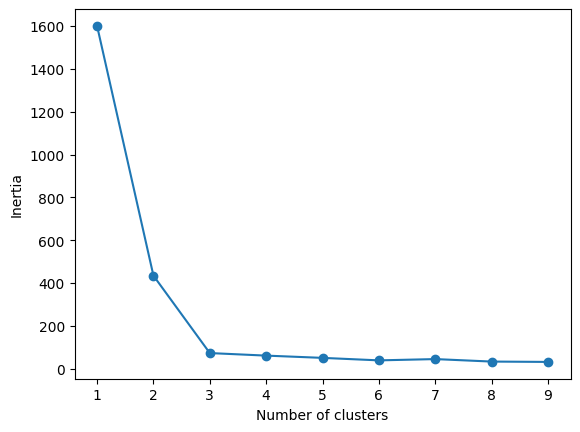

In [14]:

plt.plot(range(1, 10), distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Taking k = 3

km = KMeans(n_clusters=3)
km.fit(X_train)

y_pred = km.predict(X_test)

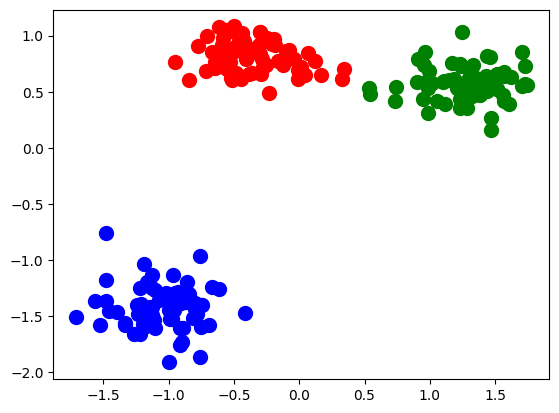

In [17]:
# Plotting the clusters

plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_test[y_pred == 2, 0], X_test[y_pred == 2, 1], s=100, c='green', label='Cluster 3')

In [20]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 10), distances, curve='convex', direction='decreasing')

kl.elbow

np.int64(3)

In [22]:
# Silhoutte Score

from sklearn.metrics import silhouette_score

print(f" Silhouette Score: {silhouette_score(X_test, y_pred)*100}%")


 Silhouette Score: 78.42617163364984%
